In [1]:
#importing packages and identifying/importing csv file
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
hotel=pd.read_csv('hotel_booking.csv')

In [2]:
# profiling dataframe. large amount of NaNs
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
# data sparsity test
#convert each column to SparseArray
spars_test = hotel.apply(pd.arrays.SparseArray)
print (spars_test.sparse.density)

0.7363893774836903


In [4]:
hotel.hotel.value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [5]:
hotel.customer_type.value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

In [6]:
hotel.market_segment.value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [7]:
hotel.meal.value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [8]:
hotel.country.value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [9]:
hotel.reserved_room_type.value_counts()

reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: count, dtype: int64

In [10]:
hotel.assigned_room_type.value_counts()

assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64

In [11]:
hotel.reservation_status.value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [12]:
hotel.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [13]:
hotel=hotel.drop(['name','email','phone-number', 'country', 'agent',
                  'distribution_channel','credit_card', 'company',
                  'reserved_room_type','assigned_room_type',
                  'reservation_status_date','reservation_status'], axis=1)

In [14]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [16]:
# remove null values
hotel = hotel.dropna(how='any',axis=0)

In [17]:
# recheck for nulls and data types
hotel.info()
print(hotel.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  object 
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  object 
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal                 

<Axes: >

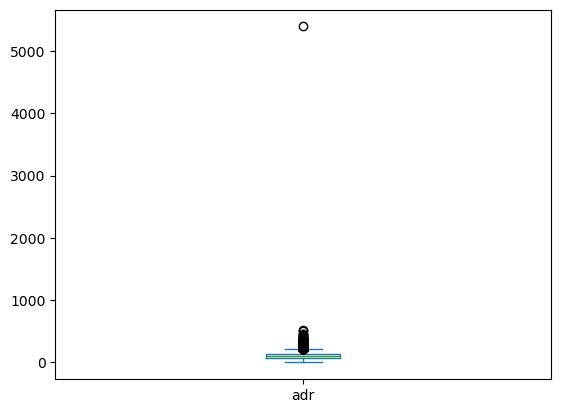

In [18]:
hotel.adr.plot(kind='box')

<Axes: >

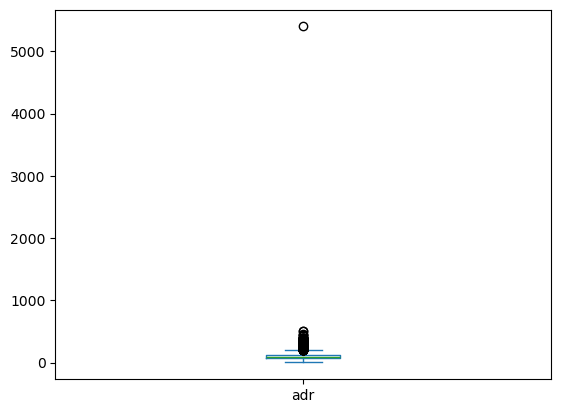

In [19]:
# remove those with average daily rate of less than 1
hotel = hotel.loc[~(hotel['adr'] < 1)];

hotel.adr.plot(kind='box')

In [20]:
print(hotel.deposit_type.value_counts())
print(hotel.arrival_date_month.value_counts())

deposit_type
No Deposit    102675
Non Refund     14587
Refundable       162
Name: count, dtype: int64
arrival_date_month
August       13707
July         12491
May          11611
April        10953
October      10929
June         10819
September    10351
March         9640
February      7920
November      6641
December      6561
January       5801
Name: count, dtype: int64


In [21]:
hotel['arrival_date'] = pd.to_datetime(hotel.arrival_date_year.astype(str) + '/' + hotel.arrival_date_month.astype(str) + '/01')
hotel.arrival_date.head()

2   2015-07-01
3   2015-07-01
4   2015-07-01
5   2015-07-01
6   2015-07-01
Name: arrival_date, dtype: datetime64[ns]

<Axes: xlabel='arrival_date'>

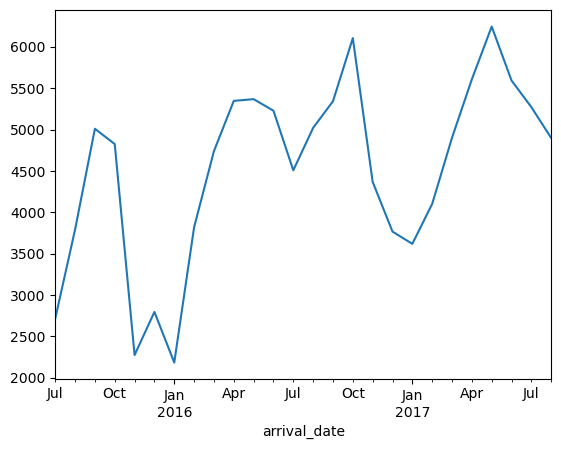

In [22]:
# look at plot of arrival dates
date = hotel['arrival_date'].value_counts().sort_index()
date.plot()

<Axes: >

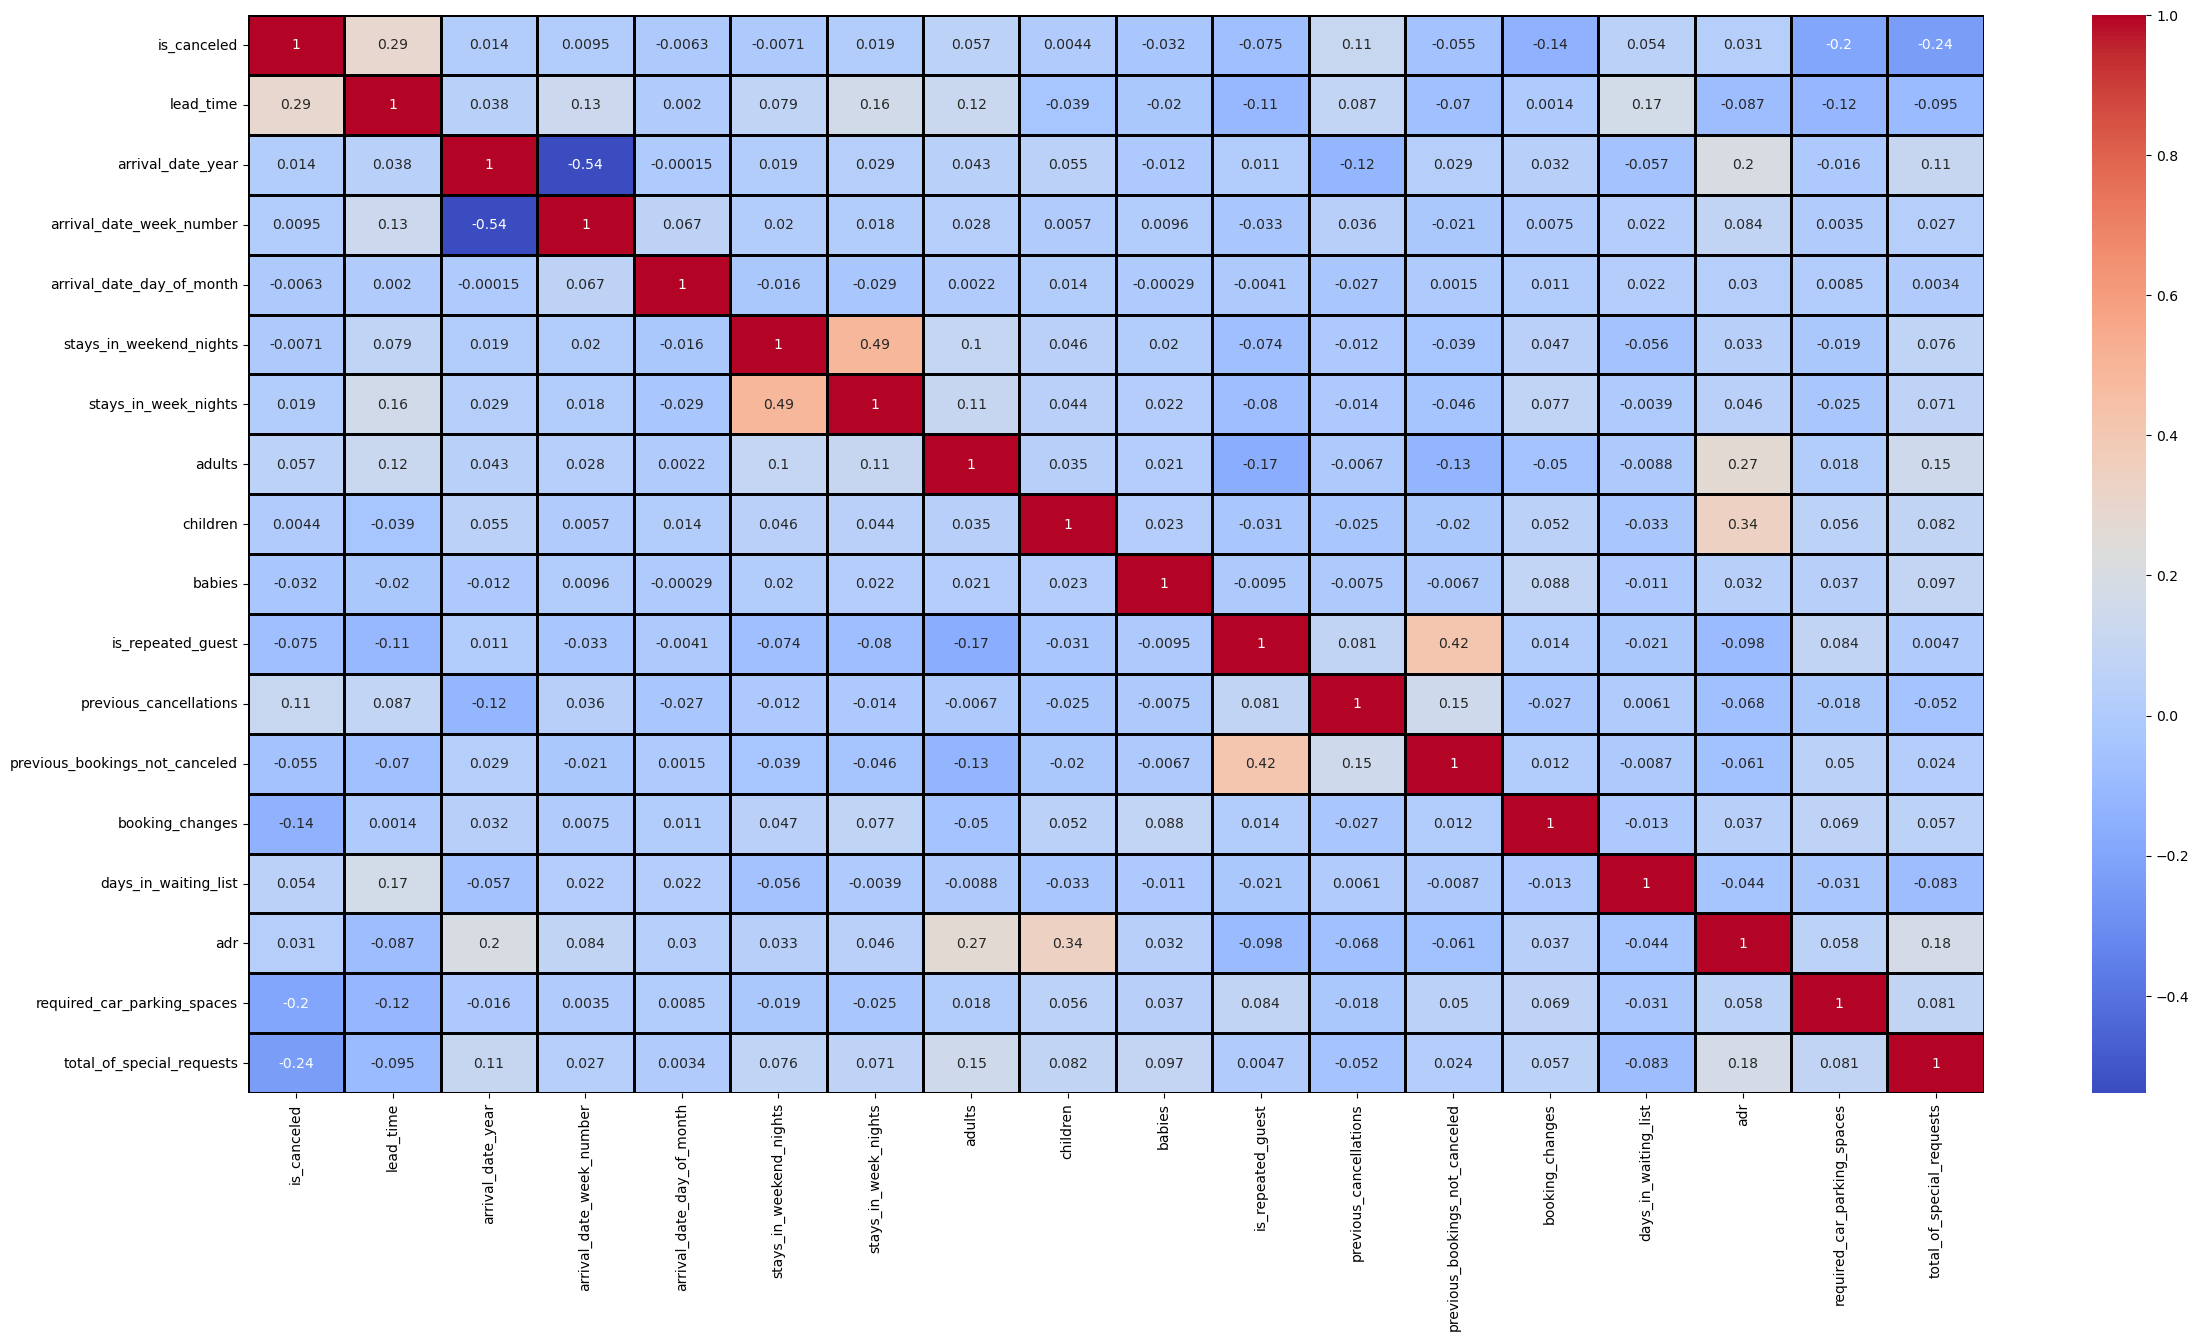

In [23]:
plt.figure(figsize=(28,14))
hotel_forcorr=hotel.select_dtypes(include=np.number)
hotel_corr=hotel_forcorr.corr()
sns.heatmap(hotel_corr,annot=True,linecolor='black', cmap='coolwarm', linewidths=2)

In [24]:
hotel = pd.get_dummies(hotel, columns=['deposit_type','arrival_date_month','customer_type','hotel','market_segment',
                                       'meal','arrival_date_year'], prefix='', prefix_sep='', dtype = 'int')
hotel

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,Offline TA/TO,Online TA,BB,FB,HB,SC,Undefined,2015,2016,2017
2,0,7,27,1,0,1,1,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,13,27,1,0,1,1,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,14,27,1,0,2,2,0.0,0,0,...,0,1,1,0,0,0,0,1,0,0
5,0,14,27,1,0,2,2,0.0,0,0,...,0,1,1,0,0,0,0,1,0,0
6,0,0,27,1,0,2,2,0.0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,35,30,2,5,2,0.0,0,0,...,1,0,1,0,0,0,0,0,0,1
119386,0,102,35,31,2,5,3,0.0,0,0,...,0,1,1,0,0,0,0,0,0,1
119387,0,34,35,31,2,5,2,0.0,0,0,...,0,1,1,0,0,0,0,0,0,1
119388,0,109,35,31,2,5,2,0.0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [25]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117424 entries, 2 to 119389
Data columns (total 54 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     117424 non-null  int64         
 1   lead_time                       117424 non-null  int64         
 2   arrival_date_week_number        117424 non-null  int64         
 3   arrival_date_day_of_month       117424 non-null  int64         
 4   stays_in_weekend_nights         117424 non-null  int64         
 5   stays_in_week_nights            117424 non-null  int64         
 6   adults                          117424 non-null  int64         
 7   children                        117424 non-null  float64       
 8   babies                          117424 non-null  int64         
 9   is_repeated_guest               117424 non-null  int64         
 10  previous_cancellations          117424 non-null  int64       

In [26]:
hotel.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,Offline TA/TO,Online TA,BB,FB,HB,SC,Undefined,2015,2016,2017
count,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,...,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000,117424.000000
mean,0.374762,105.088611,27.136914,15.803192,0.936308,2.520984,1.860625,0.104510,0.007869,0.027873,...,0.203425,0.477824,0.773343,0.006660,0.121457,0.088909,0.009632,0.182297,0.475099,0.342605
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,71.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,162.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,709.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.484063,106.907872,13.575787,8.783545,0.995209,1.892453,0.482095,0.399699,0.097171,0.164611,...,0.402548,0.499510,0.418671,0.081335,0.326659,0.284613,0.097668,0.386090,0.499382,0.474583


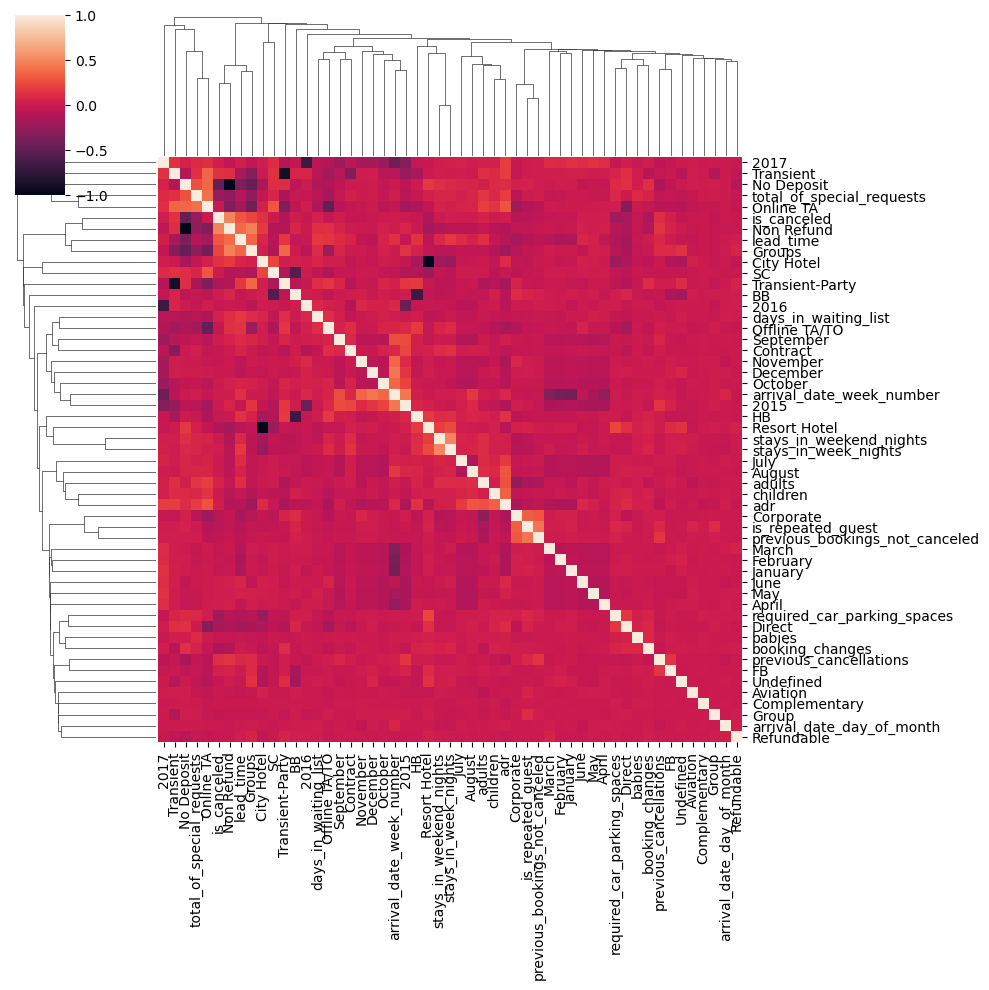

In [27]:
hotel_corr=hotel.select_dtypes(include=np.number)
corr=hotel_corr.corr()
sns.clustermap(data=corr, xticklabels=True, yticklabels=True)

In [28]:
# Select independent variables and dependent variable
X = hotel.drop(['is_canceled','arrival_date_week_number','arrival_date_day_of_month','arrival_date'], axis=1)

y = hotel['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=50)

In [30]:
# run training model with no hyperparameter tuning
rf = RandomForestClassifier(random_state=50)

#fit model
rf_h=rf.fit(X_train, y_train) 

y_train_pred=rf_h.predict(X_train)

model_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy:', round(model_accuracy*100,2), '%')
print(classification_report(y_train, y_train_pred))

Accuracy: 99.02 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58778
           1       0.99      0.98      0.99     35161

    accuracy                           0.99     93939
   macro avg       0.99      0.99      0.99     93939
weighted avg       0.99      0.99      0.99     93939



In [29]:
# try parameter tuning now
# Defining parameter range 
params = {"n_estimators": [300,500,1000],
         "max_features": [5,10,20,40],
         "max_depth": [10,20,40]
         }
rf = RandomForestClassifier(random_state=50)

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid= params, 
                       cv = 3, 
                       scoring = None, 
                       n_jobs= -1,
                       verbose = 1,
                       error_score='raise') 

#Fitting the model for grid search 
rf_grid_search = rf_grid.fit(X_train, y_train) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [30]:
# check best parameters and scores
print('The best parameters for the RF model are: ') 
print(rf_grid_search.best_params_) 

y_train_pred=rf_grid_search.predict(X_train)

model_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy:', round(model_accuracy*100,2), '%')
print(classification_report(y_train, y_train_pred))

The best parameters for the RF model are: 
{'max_depth': 40, 'max_features': 10, 'n_estimators': 300}
Accuracy: 99.02 %
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     58778
           1       0.99      0.98      0.99     35161

    accuracy                           0.99     93939
   macro avg       0.99      0.99      0.99     93939
weighted avg       0.99      0.99      0.99     93939



In [31]:
# fit RF with new best parameters
rfc = RandomForestClassifier(random_state=50,
                             n_estimators=300,
                             max_features=10,
                             max_depth=40)
#fit model
rfc_h=rfc.fit(X_train, y_train) 

y_pred=rfc_h.predict(X_test)

model_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:', round(model_accuracy*100,2), '%')
print(classification_report(y_test, y_pred))

Accuracy: 86.63 %
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     14640
           1       0.86      0.77      0.81      8845

    accuracy                           0.87     23485
   macro avg       0.86      0.85      0.85     23485
weighted avg       0.87      0.87      0.86     23485



In [32]:
print(confusion_matrix(y_test, y_pred))

[[13523  1117]
 [ 2024  6821]]


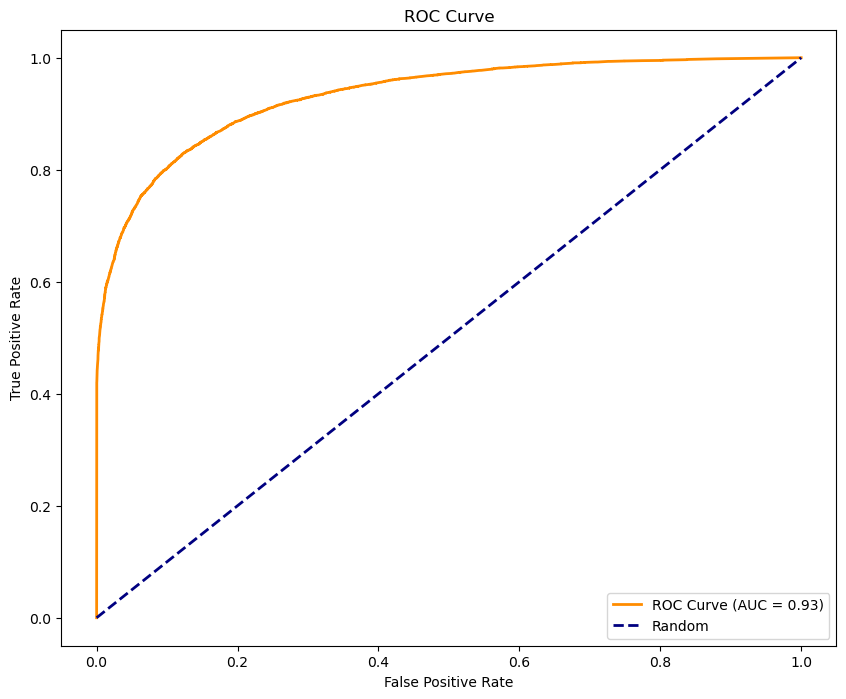

In [33]:
# Plot ROC Curve
y_prob = rfc_h.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
        label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

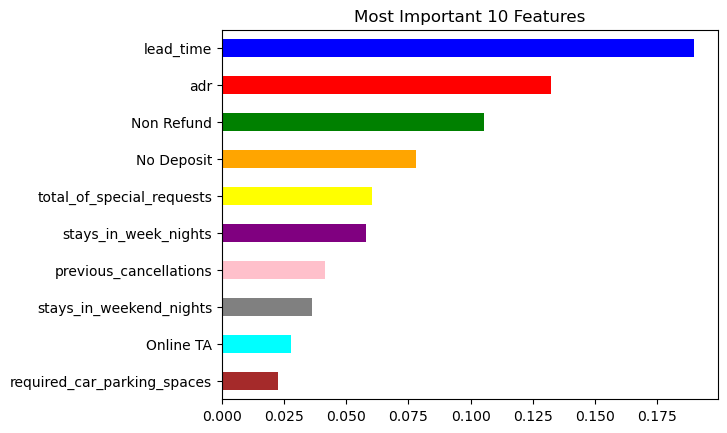

In [34]:
# plot most important features
feat_importances = pd.Series(rfc_h.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh',
                                   color = ['blue','red','green','orange','yellow','purple',
                                            'pink','gray','cyan','brown'],
                                   title = "Most Important 10 Features").invert_yaxis()

<Axes: title={'center': 'Least Important 10 Features'}>

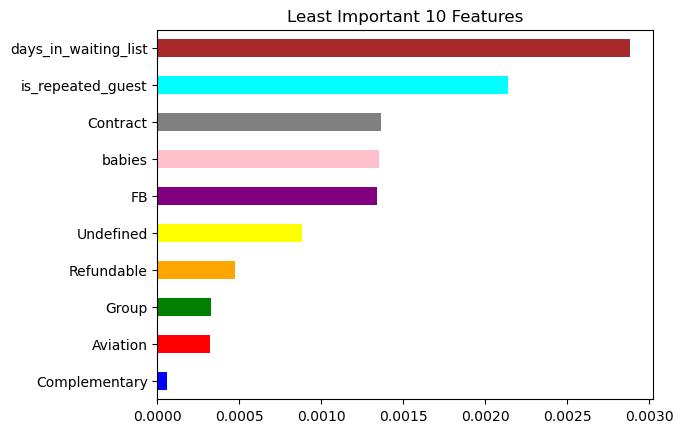

In [35]:
# plot least important features
feat_importances.nsmallest(10).plot(kind='barh',
                                    color = ['blue','red','green','orange','yellow','purple',
                                            'pink','gray','cyan','brown'],
                                    title = "Least Important 10 Features")